상품 id 입력받아서 그 상품과 유사한 상품 추천 

### Import

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

### load data

In [23]:
meta_data = pd.read_csv('./out_content.zip')
meta_data.head()

,article_id,product_group_name,index_group_name,garment_group_name
0,108775015,Garment Upper body,Ladieswear,Jersey Basic
1,108775044,Garment Upper body,Ladieswear,Jersey Basic
2,108775051,Garment Upper body,Ladieswear,Jersey Basic
3,110065001,Underwear,Ladieswear,"Under-, Nightwear"
4,110065002,Underwear,Ladieswear,"Under-, Nightwear"


In [33]:
meta_data = pd.get_dummies(meta_data, columns=['product_group_name', 'index_group_name', 'garment_group_name'])
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 46 columns):
 #   Column                                            Non-Null Count   Dtype
---  ------                                            --------------   -----
 0   article_id                                        105542 non-null  int64
 1   product_group_name_Accessories                    105542 non-null  bool 
 2   product_group_name_Bags                           105542 non-null  bool 
 3   product_group_name_Cosmetic                       105542 non-null  bool 
 4   product_group_name_Fun                            105542 non-null  bool 
 5   product_group_name_Furniture                      105542 non-null  bool 
 6   product_group_name_Garment Full body              105542 non-null  bool 
 7   product_group_name_Garment Lower body             105542 non-null  bool 
 8   product_group_name_Garment Upper body             105542 non-null  bool 
 9   product_group_name_Garment

In [34]:
meta_data.shape

(105542, 46)

In [35]:
articles_df = pd.read_csv('./h-and-m-personalized-fashion-recommendations/articles.csv')
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [36]:
articles_df.shape

(105542, 25)

빈도 기반으로 상품 추천을 하기 위해 코사인 유사도를 이용하였다. 특정 행을 사용하여 다른 모든 행과의 유사도 점수를 하나씩 계산하여, 해당 항목에 대한 유사도를 나타내는 배열을 생성했다.

### Building

In [37]:
# articleid = input('Article ID: ')
articleid = 110065011
article = articles_df.index[articles_df['article_id'] == int(articleid)]
article

Index([5], dtype='int64')

In [38]:
# 메타데이터를 추출하고, 코사인 유사도 계산을 위해 해당 데이터를 적절한 형태로 변환
y = np.array(meta_data.loc[article])
y = y.reshape(1, -1)
y

array([[110065011, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, True,
        False, False]], dtype=object)

In [39]:
# 코사인 유사도 계산
cos_sim = cosine_similarity(meta_data, y)
cos_sim = pd.DataFrame(data=cos_sim, index=meta_data.index)
cos_sim.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [40]:
n_recs = 10
# 코사인 유사도가 높은 순으로 정렬
cos_sim.sort_values(by = 0, ascending = False, inplace=True)
# 자기 자신을 제외하고 가장 유사도가 높은 n_recs개 추출
results = cos_sim.index.values[1:n_recs+1]
results

array([70358, 70368, 70367, 70366, 70365, 70364, 70363, 70362, 70361,
       70360])

## Cosine Similarity Function

In [41]:
meta_data

,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,108775015,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,108775044,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,108775051,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,110065001,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,110065002,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
105538,953763001,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
105539,956217002,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105540,957375001,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# 아이템을 기반으로 가장 유사한 10개의 아이템을 추천하는 함수
def article_recommend():
    # title = input('Article ID: ')
    
    article = articles_df.index[articles_df['article_id'] == int(articleid)]
    n_recs = 10
    
    y = np.array(meta_data.loc[article]).reshape(1, -1)
    cos_sim = cosine_similarity(meta_data, y)
    cos_sim = pd.DataFrame(data=cos_sim, index=meta_data.index)
    cos_sim.sort_values(by = 0, ascending = False, inplace=True)
    results = cos_sim.index.values[1:n_recs+1]
    results_df = articles_df.loc[results]
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'prod_name':'Product Name','product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name':'Garment Group Name'}, inplace=True)
    results_df = results_df[['article_id', 'Product Name', 'Product Type Name', 'Product Group Name', 'Index Group Name', 'Garment Group Name']]
    return results_df

## Evaluation

In [43]:
pd.set_option('display.max_colwidth', None)

In [80]:
import matplotlib.pyplot as plt
path = "./h-and-m-personalized-fashion-recommendations/images"
rcmnds_img=article_recommend()

def article_recommend_img():
    fig = plt.figure(figsize=(20, 10))
    for i, item in enumerate(rcmnds_img['article_id']):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        ax = fig.add_subplot(1, 10, i+1)  
        ax.imshow(image)
        ax.axis('off')  

    plt.show()  

In [82]:
article_recommend()

,article_id,Product Name,Product Type Name,Product Group Name,Index Group Name,Garment Group Name
0,760158001,DIV Rachel denim,Trousers,Garment Lower body,Divided,Unknown
1,760214002,Semide tie dress,Dress,Garment Full body,Ladieswear,Dresses Ladies
2,760208001,Class Cleo bracelet,Bracelet,Accessories,Ladieswear,Accessories
3,760195006,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
4,760195005,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
5,760195004,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
6,760195003,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
7,760195002,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
8,760195001,FLORA turtle neck,Top,Garment Upper body,Baby/Children,Jersey Basic
9,760184002,Attila Boot SB,Boots,Shoes,Baby/Children,Shoes


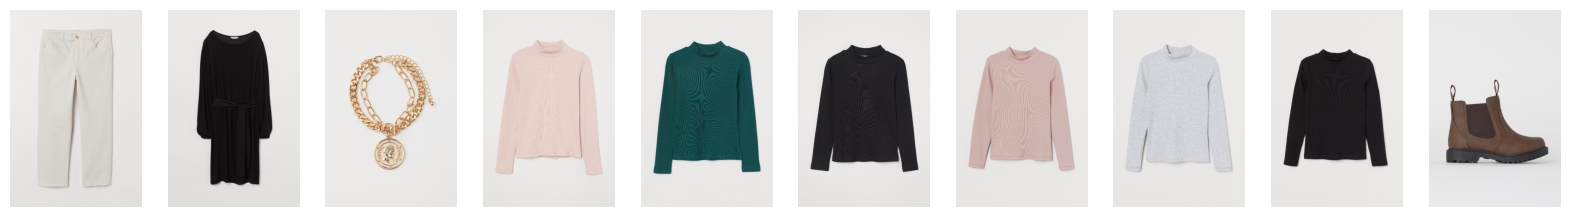

In [83]:
article_recommend_img()

## Conclusion

아티클 ID를 입력받아 이를 기반으로 사용자에게 10개의 아이템을 추천해준다. 
유사한 아티클을 찾고자 하는 누구든지 사용할 수 있다. 이는 어떠한 고객의 이전 구매도 필요로 하지 않는다. 